In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

# Read the dataset

In [2]:
header_data = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
x_train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train_data = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header = None)
x_test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header = None)
y_test_data = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header = None)

# Fix the train and test datasets

In [3]:
x_train_data.columns = header_data[1]
x_test_data.columns = header_data[1]

In [4]:
x_train_data['Activity'] = y_train_data
train_data = x_train_data
x_test_data['Activity'] = y_test_data
test_data = x_test_data

In [5]:
train_data.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [6]:
print(train_data.shape, test_data.shape)

(7352, 562) (2947, 562)


In [7]:
train_data.describe()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


In [8]:
train_data['Activity'].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

# Taking a sample just to find the best model

In [9]:
sample_data = train_data.loc[0:500,:]

Text(0,0.5,'Count')

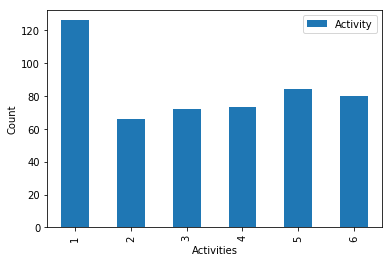

In [10]:
sample_data.Activity.value_counts().to_frame().sort_index().plot(kind='bar')
plt.pyplot.xlabel('Activities')
plt.pyplot.ylabel('Count')

In [11]:
from sklearn.model_selection import train_test_split
x_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:, -1]
x_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:, -1]
#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [12]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion="entropy")
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
yhat_dt = classifier.predict(x_test)

In [14]:
from sklearn.metrics import jaccard_similarity_score
dt_score = jaccard_similarity_score(y_test, yhat_dt)
dt_score

0.8520529351883271

In [15]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(n_estimators=40,criterion='entropy')
r_model.fit(x_train, y_train)
yhat_rf = r_model.predict(x_test)

rf_score = jaccard_similarity_score(y_test, yhat_rf)
rf_score

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9314557176789956

In [16]:
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks = 15
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
CM = []
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
mean_acc
"""

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import metrics\nks = 15\nmean_acc = np.zeros((ks-1))\nstd_acc = np.zeros((ks-1))\nCM = []\nfor n in range(1,ks):\n    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)\n    y_hat = neigh.predict(x_test)\n    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)\n    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])\nmean_acc\n'